# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

***1. Precio del metro cuadrado en la zona:***

*Considero que este factor es importante en cualquier parte del mundo, ya que depende de cada zona el precio del metro cuadrado, es por ello que considero indispensable para predicciones de precio.*

***2. Número de habitaciones:***

*Este factor tambien lo considero ya que en muchas partes del mundo se le da bastante importancia el numero de habitaciones ya que de ello depende el número de personas que podrían llegar a vivir en el lugar.*

***3. Cantidad de zona construida:***

*Este factor de igual manera es importante ya que indica cuanta inversión en material se realizó en la construcción.*

***4. Tipo de construcción:***

*Considero importante este dato ya que en construcciones comerciales suele incrementarse el costo.*

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#librerias para entrenamiento de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [461]:
#importamos el dataset y las primeras 5 instancias.
#Usamos el mismo dataset en dos diferentes para poder hacer un curado más adelante.
propiedades=pd.read_csv('Datos_propiedades.csv')
propiedades.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [462]:
#Checamos el tamaño del dataset
propiedades.shape

(146660, 19)

In [463]:
#Checamos las columnas con las que viene integrado el primer dataset
propiedades.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [464]:
#Checamos los valores faltantes en el dataset inicial
propiedades.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [465]:
#Visualizamos cuantos tipos de propiedades hay en el dataset
propiedades.property_type

0         Departamento
1                   PH
2                   PH
3                   PH
4                   PH
              ...     
146655    Departamento
146656    Departamento
146657    Departamento
146658    Departamento
146659    Departamento
Name: property_type, Length: 146660, dtype: object

In [466]:
#Vizualizamos los valores unicos por propiedad
propiedades['property_type'].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [467]:
len(propiedades['property_type'].unique())

10

In [468]:
#Contamos la cantidad de unidades por tipo de departamentos
propiedades['property_type'].value_counts()


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [469]:
#Realizamos un primer cheque de como se distribuye el dataset
propiedades.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


 <font color='FIREBRICK' face='cambria' size=4> En la siguiente gráfica se muestra la distribución de las propiedades de acuerdo a sus tipos</font>

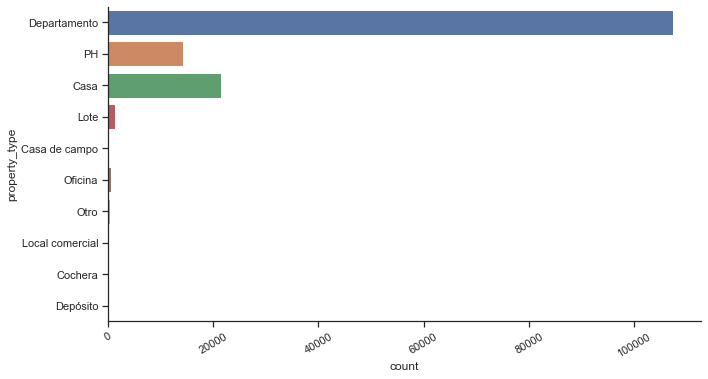

In [470]:
#Escalamos el gráfico para visaulizarlo de mejor forma


g_property_type = sns.catplot(y="property_type", data=propiedades, aspect=2, kind="count")
g_property_type.set_xticklabels(rotation=30)


#El eje x representa la cantidad de propiedades para cada tipo, el eje y representa los diferentes tipos de propiedades,
#por consiguiente la gráfica nos muestra la proporción que hay por cada tipo de propiedad

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

 <font color='FIREBRICK' face='cambria' size=4> En la siguiente gráfica se muestra la distribución de las propiedades de acuerdo a las zonas de argentina estudiadas</font>

Text(0.5, 0, 'Cantidad')

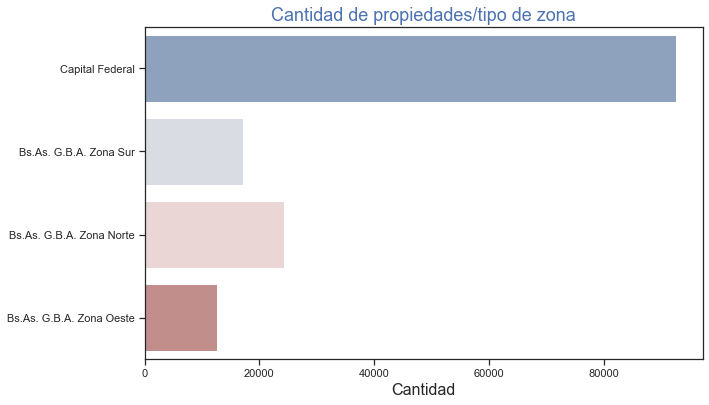

In [471]:
#Procedemos a ver el gráfico por zona
plt.figure(figsize = (10,6))

g_zona=sns.countplot(y=propiedades.l2.values, palette="vlag")

g_zona.set_title('Cantidad de propiedades/tipo de zona', fontsize=18,color='b')
g_zona.set_xlabel('Cantidad', fontsize=16)
#El eje y nos muestra las diferentes zonas en la que se distribuyen las propiedades, en el eje x representa la cantidad
#por consiguiente la gráfica nos muestra como se distribuyen las propiedades en las diferentes zonas.

 <font color='FIREBRICK' face='cambria' size=4> En las siguientes gráficas nos muestra tanto la distribución de las propiedades de acuerdo a las zonas de Argentina, asi como la distribución por barrios de Argentina</font>

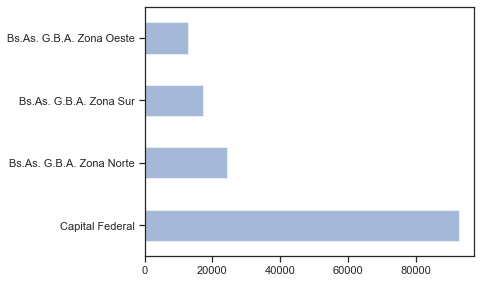

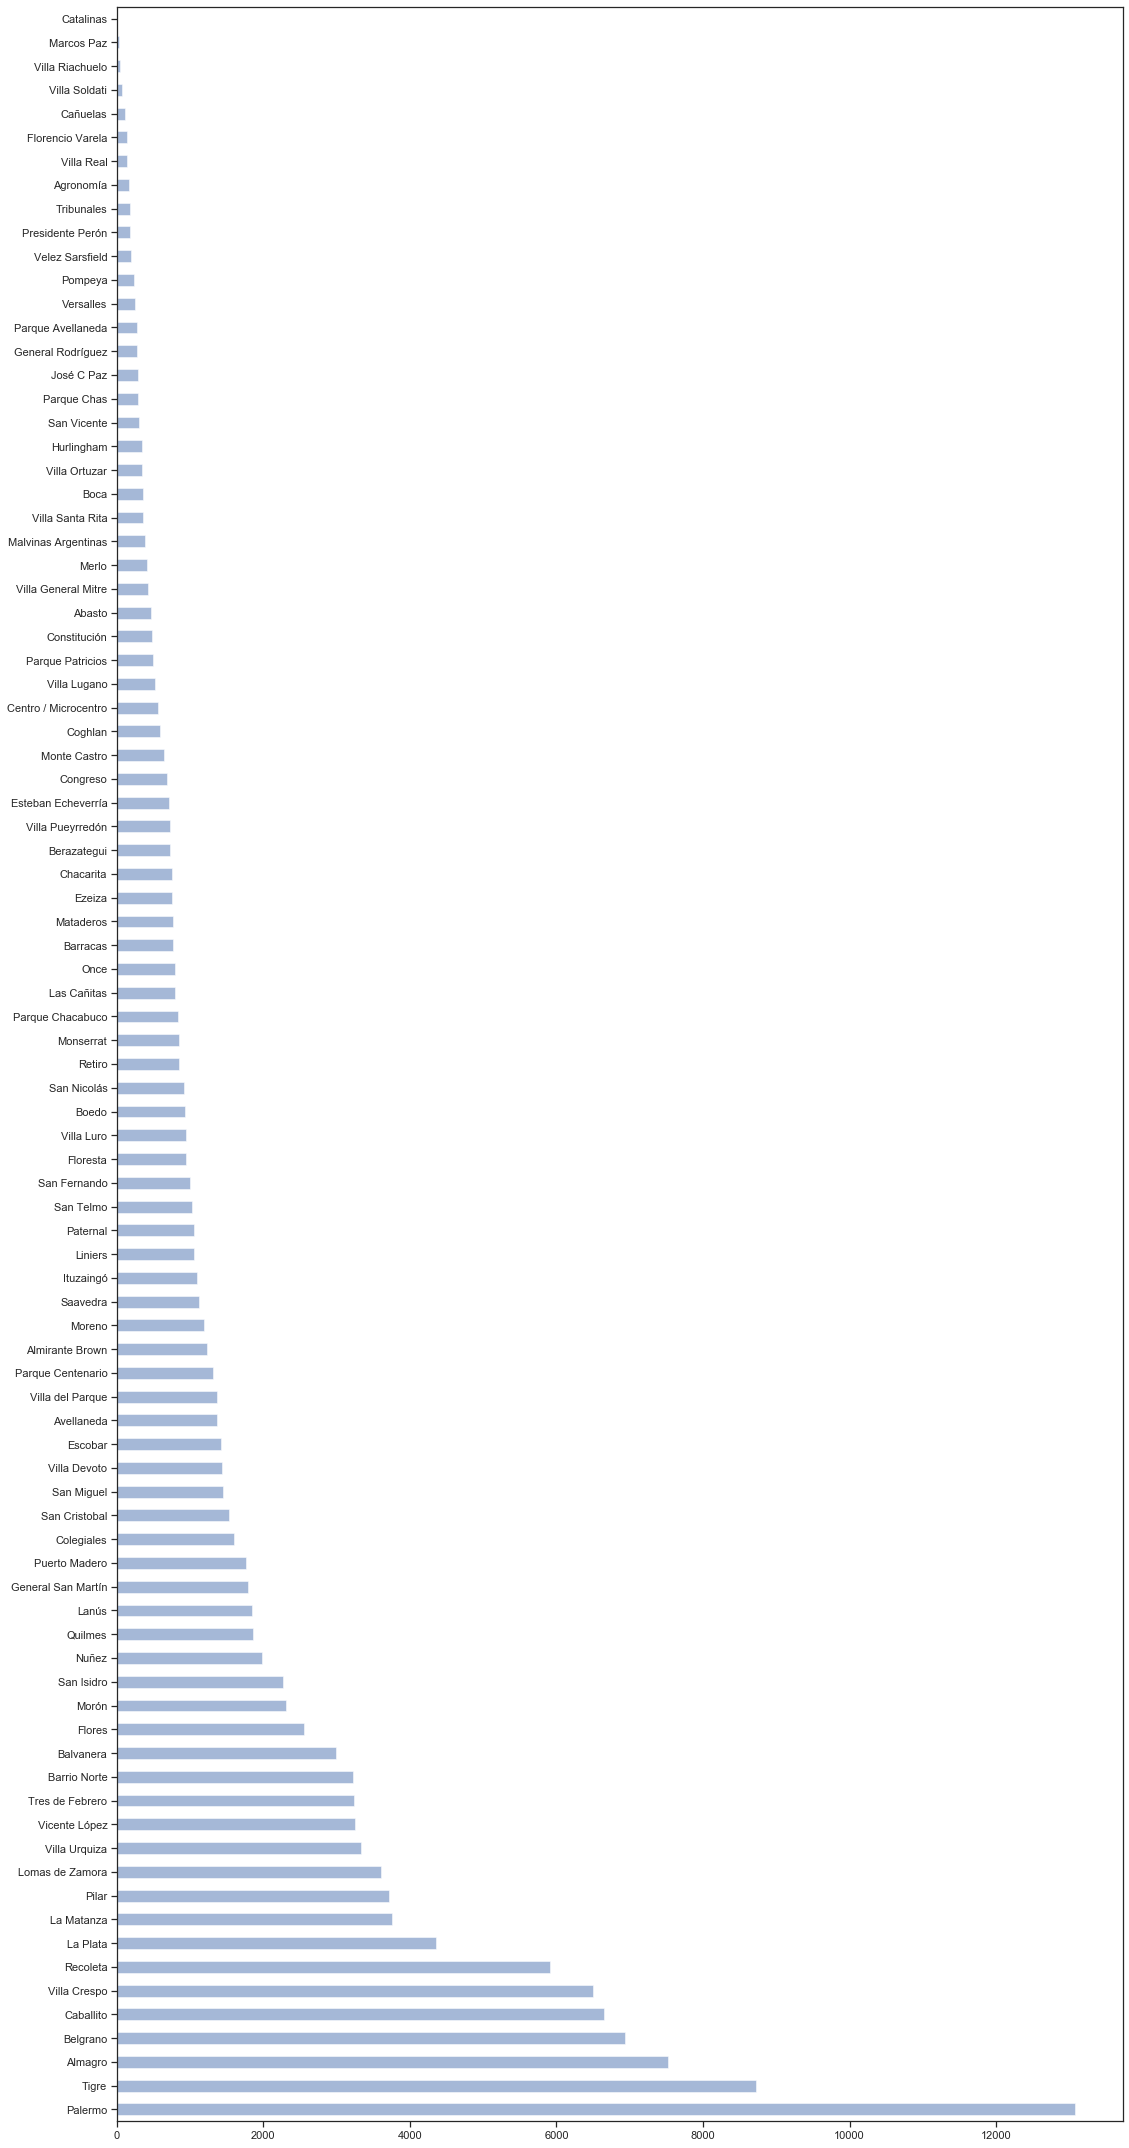

In [472]:
#Exploramos la distribución por región y por barrio
l2=propiedades.l2
l3=propiedades.l3
plt.figure(figsize = (6.5*2,4.5))
ax1=plt.subplot(1,2,1)
propiedades.l2.value_counts().plot(kind='barh', alpha=0.5,ax=ax1)


plt.figure(figsize = (30,30))
ax2=plt.subplot(1,2,2)
propiedades.l3.value_counts().plot(kind='barh', alpha=0.5,ax=ax2)

plt.tight_layout()

plt.show()

#Aquí se visualizan 2 gráficos en conjunto, el primero es replica del gráfico anterior, en el segundo gráfico se muestra en el eje y
#los diferentes barrios en los que se distribuyen las propiedades, en el eje x la cantidad de ellos, teniendo como resultado la
#la distribución de las propiedades por barrios

**Realizamos un primer análisis de la distribución de las variables.**



 <font color='FIREBRICK' face='cambria' size=4> En las siguientes gráficas nos muestra como se distribuyen las propiedades de acuerdo a las posiciones ya sea en latitudes o longitudes.</font>

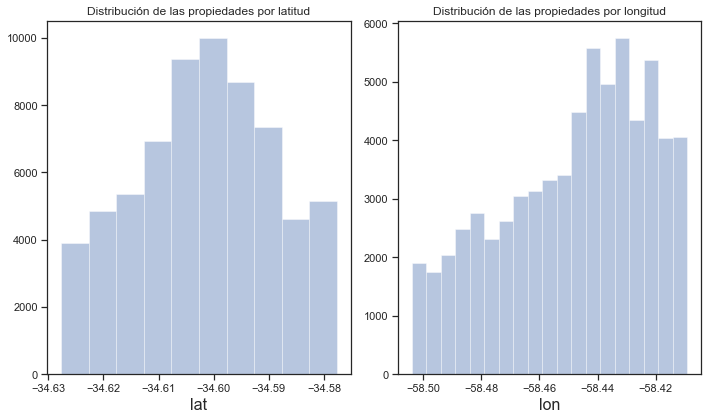

In [473]:
#Se visualiza por latitud y longitud
a=propiedades.lat.dropna()
b=a.values
percentil25=np.percentile(b,q=[25])
percentil75=np.percentile(b,q=[75])
c=propiedades.lon.dropna()
d=c.values
percentil25_2=np.percentile(d,q=[25])
percentil75_2=np.percentile(d,q=[75])

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.set(style="ticks")

sns.distplot(propiedades["lat"].values,kde=None,bins=np.arange(percentil25,percentil75,0.005), ax=ax1)
sns.distplot(propiedades["lon"].values,kde=None,bins=np.arange(percentil25_2,percentil75_2,0.005),ax=ax2)

ax1.set_title('Distribución de las propiedades por latitud', fontsize=12)
ax2.set_title('Distribución de las propiedades por longitud',fontsize=12)
ax1.set_xlabel('lat', fontsize=16)
ax2.set_xlabel('lon',fontsize=16)

fig.tight_layout()
plt.show()

#Aqui se presenta dos gráficas , en una de ellas representan la distribución acorde a su longitud y en la otra es acorde a su latitud.

 <font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 1, <font color='FIREBRICK' face='cambria' size=3> vemos como se distribuyen las cantidades de rooms en las propiedades.  
    
<font color='black' face='arial' size=4>Gráfica 2<font color='FIREBRICK' face='cambria' size=3> vemos como se distribuyen las cantidades de bedrooms en las propiedades. 

<font color='black' face='arial' size=4>Gráfica 3 <font color='FIREBRICK' face='cambria' size=3> vemos como se distribuyen las cantidades de bathrooms .</font>


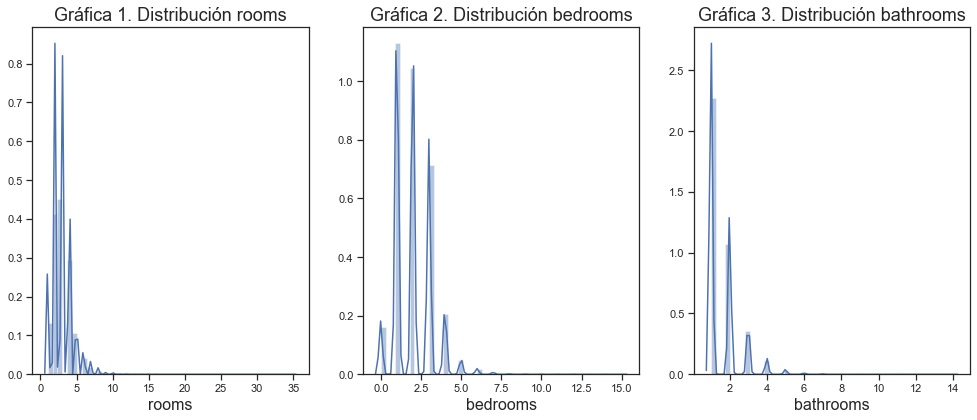

In [474]:
#Añadimos otros gráficos a nuestro primer análisis
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3=  fig.add_subplot(1,3,3)

sns.distplot(propiedades['rooms'],ax=ax1)
sns.distplot(propiedades['bedrooms'],ax=ax2)
sns.distplot(propiedades['bathrooms'],ax=ax3)

ax1.set_title('Gráfica 1. Distribución rooms', fontsize=18)
ax2.set_title('Gráfica 2. Distribución bedrooms',fontsize=18)
ax3.set_title('Gráfica 3. Distribución bathrooms',fontsize=18)
ax1.set_xlabel('rooms',fontsize=16)
ax2.set_xlabel('bedrooms', fontsize=16)
ax3.set_xlabel('bathrooms',fontsize=16)

fig.tight_layout()
plt.show()

#Estos gráficos se agruparon ya que comparten caracteristicas, en el primer grafico se visualiza la distribución de los rooms,
#en el segundo gráfico se visualiza la distribucion de bedrooms y en el último gráfico se visualiza la distribución de bathrooms

Tambien se muestra una relacion entre la distribución de cada una de estas variables


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 4. <font color='FIREBRICK' face='cambria' size=3> En la siguiente gráfica vemos como se distribuyen las propiedades acorde a su surface_covered.  
    
<font color='black' face='arial' size=4>Gráfica 5.<font color='FIREBRICK' face='cambria' size=3> En esta gráfica vemos como se comporta la distribución de las propiedades acorde a su surface_total. 

<font color='black' face='arial' size=4>Gráfica 6. <font color='FIREBRICK' face='cambria' size=3> En esta gráfica vemos como se comportan las propiedades acorde a su precio.</font>


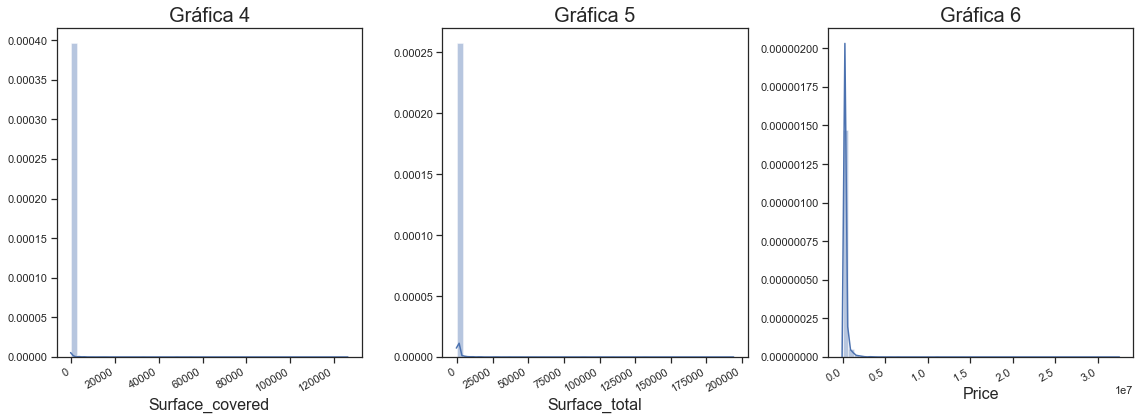

In [475]:
#Se muestra la distribución por espacio total, construido y precio
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3=  fig.add_subplot(1,3,3)

sns.distplot(propiedades['surface_covered'],ax=ax1)
sns.distplot(propiedades['surface_total'],ax=ax2)
sns.distplot(propiedades['price'],ax=ax3)

ax1.set_title('Gráfica 4', fontsize=20)
ax2.set_title('Gráfica 5', fontsize=20)
ax3.set_title('Gráfica 6', fontsize=20)
ax1.set_xlabel('Surface_covered',fontsize=16)
ax2.set_xlabel('Surface_total', fontsize=16)
ax3.set_xlabel('Price',fontsize=16)

fig.autofmt_xdate()
fig.tight_layout()

plt.show()

#En el primer gráfico se visualiza la distribución  de surface_covered en las propiedades, la segunda gráfica se visualiza la 
#distribución del surface_total y por último la distribución de los precios de las propiedades

**En conclusión, en esta parte se realizó un  primer análisis de la distribución de las variables individuales, no obstante a diferentes situaciones propias del dataset no se pudo llegar a ninguna conclusión.**

***A continuación haremos un primer análisis de relación entre variables.***

<font color='FIREBRICK' face='arial' size=4> En las siguiente gráfica:
 
<font color='black' face='arial' size=4>Gráfica 7. <font color='FIREBRICK' face='cambria' size=3> En la siguiente gráfica vemos como se distribuyen cada tipo de propiedades y su relación
con el precio.</font> 
    


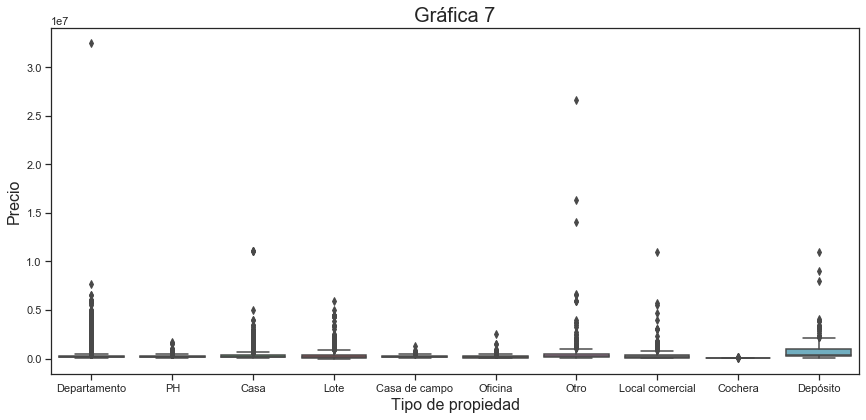

In [476]:
#A partir de aquí se presenta la relación que hay entre todas las variables y la variable de interés
fig=plt.figure(figsize=(35,6))
ax1 = fig.add_subplot(1,3,1)

sns.boxplot(data = propiedades, x='property_type',y="price",ax=ax1)

ax1.set_title('Gráfica 7', fontsize=20)
ax1.set_xlabel('Tipo de propiedad', fontsize=16)
ax1.set_ylabel('Precio', fontsize=16)

fig.tight_layout()
plt.show()
#En el gráfico siguiente se muetra la distribucion de las propiedades en relación al precio


 
<font color='black' face='arial' size=4>Gráfica 8. <font color='FIREBRICK' face='cambria' size=3> Representa las zonas de argentina y su comportamiento de acuerdo al precio.</font> 

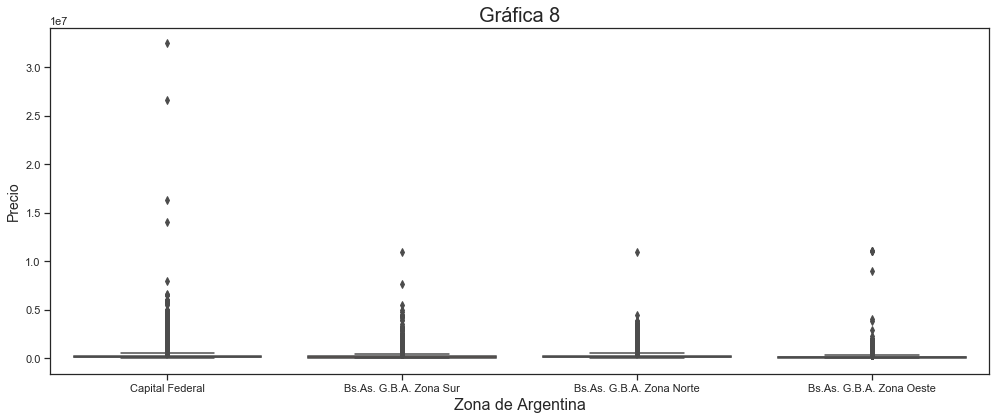

In [477]:
#Gráfica de las zonas de argentina
fig=plt.figure(figsize=(14,6))

ax=sns.boxplot(data = propiedades, x='l2',y="price")

ax.set_title('Gráfica 8', fontsize=20)
ax.set_xlabel('Zona de Argentina', fontsize=16)
ax.set_ylabel('Precio', fontsize=14)


fig.tight_layout()
plt.show()
#En el siguiente gráfico se visualiza la distribución de las zonas y su relación con el precio

 
<font color='black' face='arial' size=4>Gráfica 9. <font color='FIREBRICK' face='cambria' size=3> Representa la distribución de las propiedades de acuerdo a surface_total y su precio.</font> 

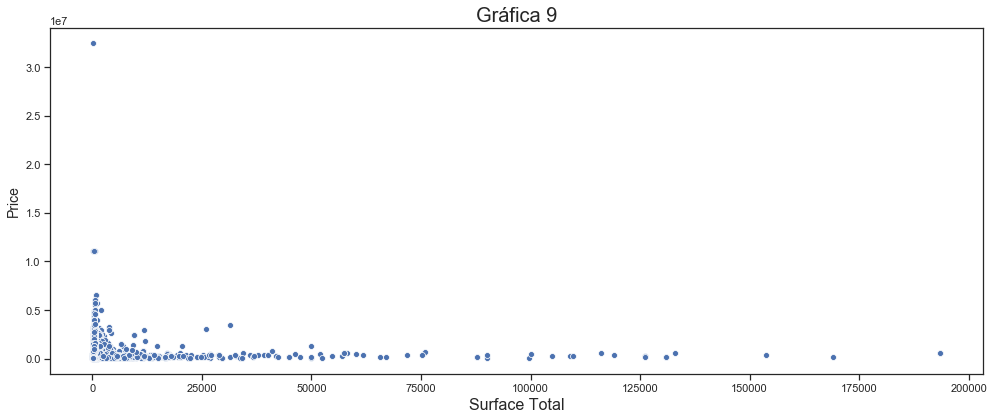

In [478]:

fig=plt.figure(figsize=(14,6))
sns.set(style="ticks")

ax=sns.scatterplot(x="surface_total", y="price", data=propiedades)

ax.set_title('Gráfica 9', fontsize=20)
ax.set_xlabel('Surface Total', fontsize=16)
ax.set_ylabel('Price', fontsize=14)

fig.tight_layout()
plt.show()

#En este gráfico se visualiza la relación entre el surface_total y el precio

<font color='black' face='arial' size=4>Gráfica 10. <font color='FIREBRICK' face='cambria' size=3> Representa la distribución de las propiedades de acuerdo a surface_covered y su precio.</font> 

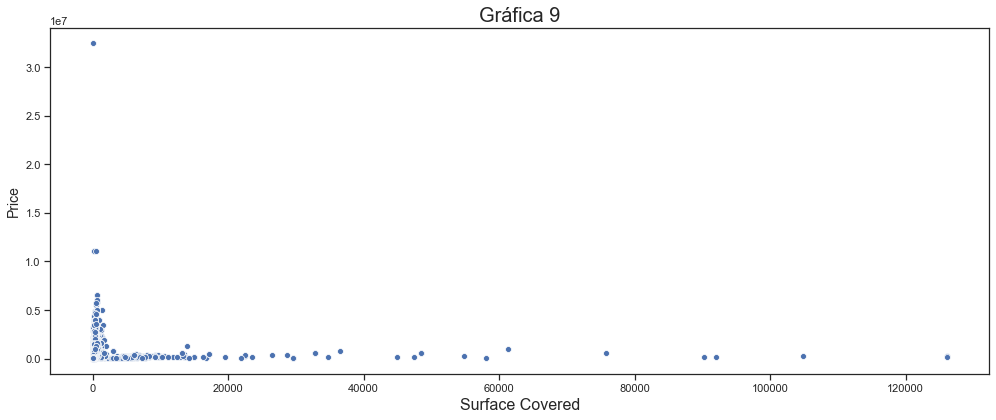

In [479]:
plt.style.use('default')
plt.rcParams["figure.dpi"] = 72
fig=plt.figure(figsize=(14,6))
sns.set(style="ticks")

ax=sns.scatterplot(x="surface_covered", y="price", data=propiedades)

ax.set_title('Gráfica 9', fontsize=20)
ax.set_xlabel('Surface Covered', fontsize=16)
ax.set_ylabel('Price', fontsize=14)

fig.tight_layout()
plt.show()
#En este gráfico se visualiza la relación entre el surface_covered y el precio

**En conclusión, en esta primera parte sin realizar un filtrado no se llegó a ninguna conclusión ni variables determinantes para las predicciones deseadas, ya que el dataset contiene mucha información con ruido, es por ello que se procede al filtrado y limpieza**

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [480]:
#Filtrando el dataset
FiltroRegion=propiedades["l2"]=="Capital Federal"
FiltroPropiedad=(propiedades["property_type"]=="Departamento") | (propiedades["property_type"]=="Casa") | (propiedades["property_type"]=="PH")
propiedades2=propiedades[FiltroRegion & FiltroPropiedad]          
propiedades_curado=propiedades2.copy()
propiedades2.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

***Separamos el dataset filtrado por tipo de  propiedades y se realizan unos pocos gráficos para ver como se comporta el dataset filtrado***

In [481]:
prop_1 ='Departamento' 
df_prop1 = propiedades2[ propiedades2["property_type"] ==  prop_1 ]
print("Tipo de propiedad:",prop_1)
df_prop1.describe()

Tipo de propiedad: Departamento


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74782.000000,74771.000000,79029.000000,79029.000000,77092.000000,70592.000000,70315.000000,7.902900e+04
mean,-34.597582,-58.433009,2.814600,1.836946,1.533324,98.604091,86.041357,2.597756e+05
std,0.022952,0.035035,1.201029,0.972290,0.844190,658.176800,497.058462,3.389683e+05
min,-34.694366,-58.530467,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.611879,-58.454965,2.000000,1.000000,1.000000,47.000000,43.000000,1.190000e+05
50%,-34.598347,-58.431504,3.000000,2.000000,1.000000,66.000000,60.000000,1.700000e+05
75%,-34.582854,-58.407354,4.000000,2.000000,2.000000,99.000000,87.000000,2.690000e+05
max,-34.535818,-58.354919,21.000000,15.000000,14.000000,108960.000000,104890.000000,3.243423e+07


*Se procede a seleccionar dos variables para graficarlas y ver las relaciones de primera instancia.*

*Esto es para cada tipo de propiedades*

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 11. <font color='FIREBRICK' face='cambria' size=3> En la siguiente gráfica se visualiza la relación entre los cuartos y el precio para las propiedades tipo Departamento.  
    
<font color='black' face='arial' size=4>Gráfica 12.<font color='FIREBRICK' face='cambria' size=3> En esta gráfica se visualiza la relación entre la surface_covered y el precio para el tipo de propiedad Departamento. 
 

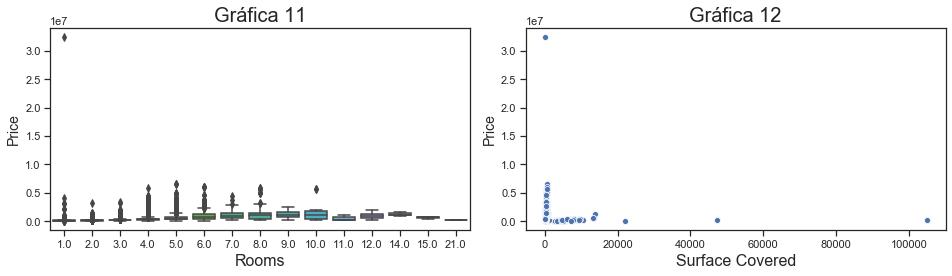

In [482]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)

ax1=sns.boxplot(data=df_prop1, x='rooms',y="price",ax=ax1)
ax2=sns.scatterplot(data=df_prop1,x="surface_covered", y="price",ax=ax2)
                    
ax1.set_title('Gráfica 11', fontsize=20)
ax2.set_title('Gráfica 12', fontsize=20)
ax1.set_xlabel('Rooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()


Nos damos cuenta que aun no es clara la visualización de las variables

In [483]:
prop_2 ='PH' 
df_prop2 = propiedades2[ propiedades2["property_type"] ==  prop_2 ]
print("Tipo de propiedad:",prop_2)
df_prop2.describe()

Tipo de propiedad: PH


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,9530.000000,9529.000000,9764.000000,9764.000000,9676.000000,9722.000000,9691.000000,9.764000e+03
mean,-34.606726,-58.450444,3.638161,2.539021,1.561182,176.362065,130.730472,2.192085e+05
std,0.025606,0.037636,1.380147,1.237956,0.790040,2232.295499,1819.098748,1.163025e+05
min,-34.695087,-58.530392,1.000000,0.000000,1.000000,10.000000,1.000000,2.700000e+04
25%,-34.621731,-58.481364,3.000000,2.000000,1.000000,70.000000,58.000000,1.350000e+05
50%,-34.606661,-58.445630,3.000000,2.000000,1.000000,105.000000,84.000000,1.915000e+05
75%,-34.591899,-58.422440,4.000000,3.000000,2.000000,152.000000,123.000000,2.700000e+05
max,-34.536984,-58.353930,16.000000,15.000000,11.000000,126062.000000,126062.000000,1.750000e+06


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 13. <font color='FIREBRICK' face='cambria' size=3> En la siguiente gráfica se visualiza la relación entre los cuartos y el precio para las propiedades tipo PH.
    
<font color='black' face='arial' size=4>Gráfica 14.<font color='FIREBRICK' face='cambria' size=3> En esta gráfica se visualiza la relación entre la surface_covered y el precio para el tipo de propiedad PH. 

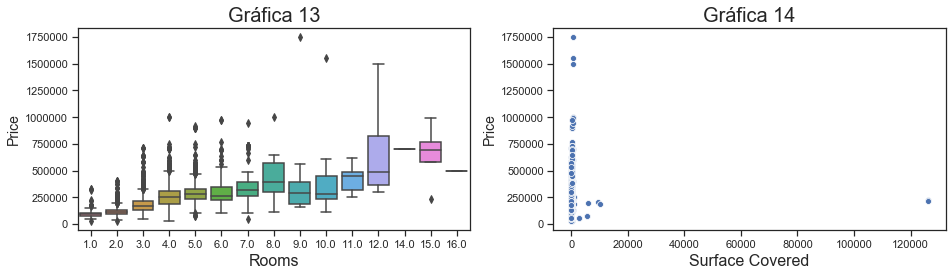

In [484]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)

ax1=sns.boxplot(data=df_prop2, x='rooms',y="price",ax=ax1)
ax2=sns.scatterplot(data=df_prop2,x="surface_covered", y="price",ax=ax2)

ax1.set_title('Gráfica 13', fontsize=20)
ax2.set_title('Gráfica 14', fontsize=20)
ax1.set_xlabel('Rooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre los cuartos y el precio para las propiedades PH.
#En la gráfica 2 se visualiza la relación entre la surface_covered y el precio para los PH.

In [485]:
prop_3 ='Casa' 
df_prop3 = propiedades2[ propiedades2["property_type"] ==  prop_3 ]
print("Tipo de propiedad:",prop_3)
df_prop3.describe()

Tipo de propiedad: Casa


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,2639.000000,2637.000000,2692.000000,2692.000000,2546.000000,2254.000000,2244.000000,2.692000e+03
mean,-34.613949,-58.468669,4.914190,3.481798,2.368421,276.877551,220.174688,3.975569e+05
std,0.033450,0.037913,1.838235,1.355187,1.156925,351.129170,400.143563,2.869463e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,25.000000,25.000000,3.000000e+04
25%,-34.638954,-58.498602,4.000000,3.000000,2.000000,164.000000,127.000000,2.400000e+05
50%,-34.617051,-58.472529,5.000000,3.000000,2.000000,230.000000,179.000000,3.300000e+05
75%,-34.588359,-58.445357,6.000000,4.000000,3.000000,330.000000,260.000000,4.800000e+05
max,-34.536165,-58.359929,26.000000,15.000000,10.000000,13250.000000,17220.000000,5.000000e+06


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 15. <font color='FIREBRICK' face='cambria' size=3> En la siguiente gráfica se visualiza la relación entre los cuartos y el precio para las propiedades tipo Casa.
    
<font color='black' face='arial' size=4>Gráfica 16.<font color='FIREBRICK' face='cambria' size=3> En esta gráfica se visualiza la relación entre la surface_covered y el precio para el tipo de propiedad Casa. 

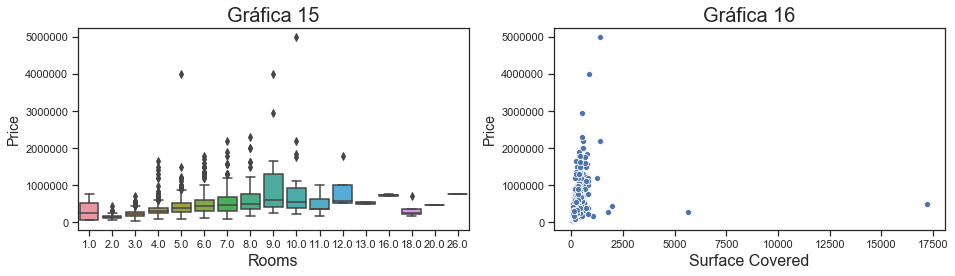

In [486]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)

sns.boxplot(data=df_prop3, x='rooms',y="price",ax=ax1)
sns.scatterplot(data=df_prop3,x="surface_covered", y="price",ax=ax2)

ax1.set_title('Gráfica 15', fontsize=20)
ax1.set_xlabel('Rooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_title('Gráfica 16',fontsize=20)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre los cuartos y el precio para las propiedades Casa.
#En la gráfica 2 se visualiza la relación entre la surface_covered y el precio para los Casa.

*Si nos damos cuenta ninguno de los gráficos anteriores no nos dan una idea clara de las relaciones ya que aun los datos generan mucho ruido*

*Para ello se procede a hacer limpieza de datos*

In [487]:
#En las gráficas anteriores no habia una correcta visualización de los gráficos, es por ello que se procede a eliminar algunos outliers 
#eliminamos outliers eliminando el cuartil 1 y 3 y de esta forma representamos graficos más concentrados y para un mejor analisis
#Calculo elcuartil #1 y el cuarti #3
Q1 = propiedades_curado.quantile(0.25)
Q3 = propiedades_curado.quantile(0.75)
# Calculo un Indice restando el cuartil 3 con el cuartil 1
IQR = Q3 - Q1
#genero una mascara que traiga todos las instancias del dataset que esten por debajo del quartil 1 menos el coeficiente IQR  y por sobre el cuartil 3 mas el coeficiente IQR
mask = (propiedades_curado< (Q1 - 1.5 * IQR)) | (propiedades_curado > (Q3 + 1.5 * IQR))
propiedades_curado[mask]=np.nan
propiedades_curado.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86075.000000,86937.000000,90827.000000,91216.000000,86019.000000,76278.000000,76140.000000,83960.000000
mean,-34.598465,-58.436002,2.919793,1.942444,1.451796,78.146058,68.740898,192323.133540
std,0.022884,0.036297,1.196680,1.017664,0.652252,39.968557,33.351791,99115.266303
min,-34.658170,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,-34.613312,-58.459605,2.000000,1.000000,1.000000,48.000000,43.000000,118000.000000
50%,-34.599178,-58.433789,3.000000,2.000000,1.000000,67.000000,60.000000,165000.000000
75%,-34.583976,-58.410143,4.000000,3.000000,2.000000,99.000000,85.000000,245000.000000
max,-34.539737,-58.353930,7.000000,6.000000,3.000000,204.000000,174.000000,517266.000000


Una vez filtrado se hace un pairplot para ver todas las relaciones posibles de las variables

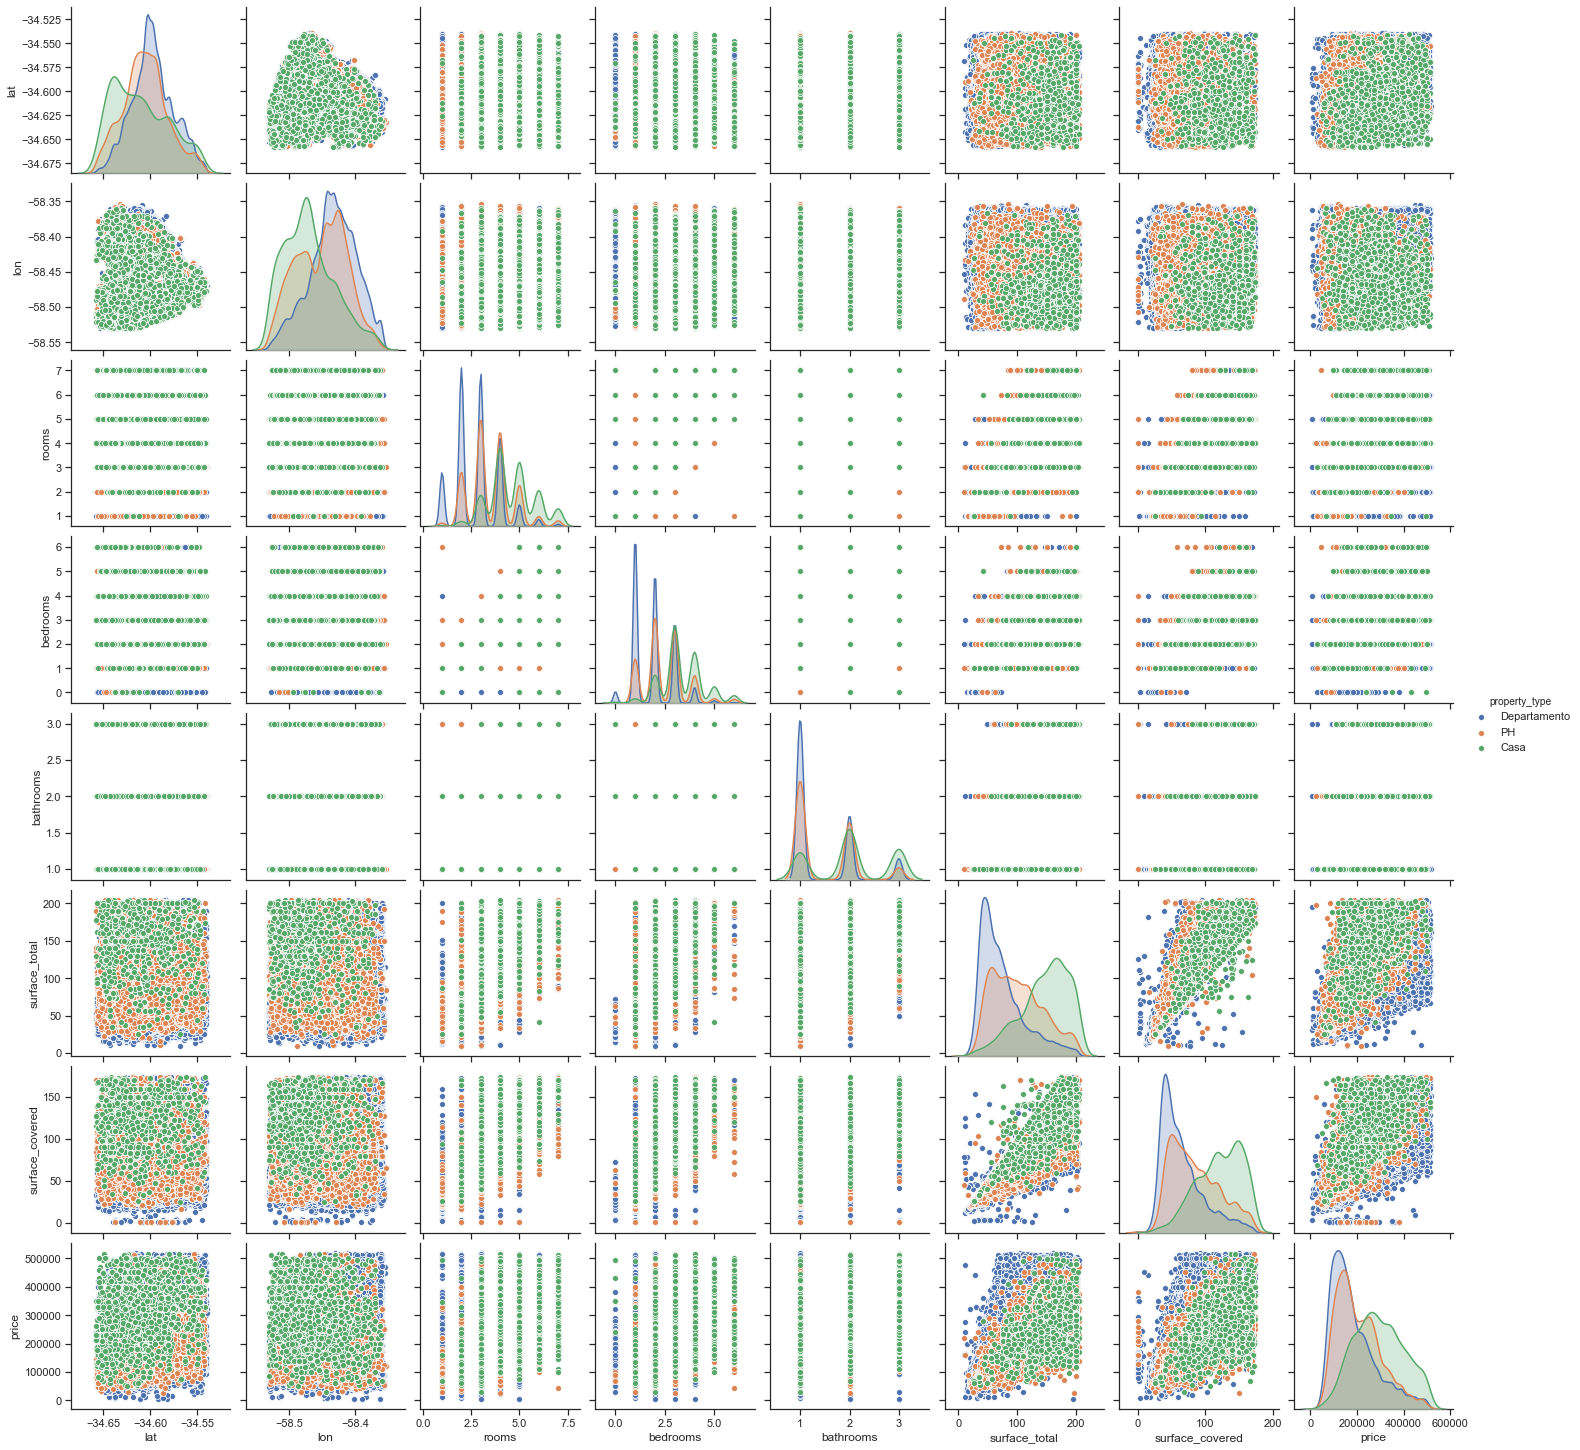

In [488]:
sns.pairplot(propiedades_curado, hue = 'property_type')

*Separamos por tipo de propiedad para mejores gráficos a pares*

In [489]:
prop_1_c ='Departamento' 
df_prop1_c = propiedades_curado[ propiedades_curado["property_type"] ==  prop_1_c]
print("Tipo de propiedad:",prop_1_c)
df_prop1_c.describe()

Tipo de propiedad: Departamento


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74309.000000,74771.000000,78715.000000,78957.000000,74400.000000,66898.000000,66294.000000,72287.000000
mean,-34.597243,-58.433009,2.790383,1.831111,1.430874,74.271249,65.683727,187023.425498
std,0.022234,0.035035,1.135850,0.951646,0.645069,37.651636,31.568240,97514.821326
min,-34.657860,-58.530467,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,-34.611465,-58.454965,2.000000,1.000000,1.000000,46.000000,42.000000,115000.000000
50%,-34.598231,-58.431504,3.000000,2.000000,1.000000,64.000000,57.000000,160000.000000
75%,-34.582818,-58.407354,4.000000,2.000000,2.000000,91.000000,80.000000,235500.000000
max,-34.539737,-58.354919,7.000000,6.000000,3.000000,204.000000,174.000000,517266.000000


***Realizamos gráficos a pares para ver relaciones y correlaciones por tipo de propiedad.***

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 17. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y surface_covered para los Departamento.
    
<font color='black' face='arial' size=4>Gráfica 18.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y surface_covered para los Departamento. 

<font color='black' face='arial' size=4>Gráfica 19.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y surface_covered para los Departamento. 

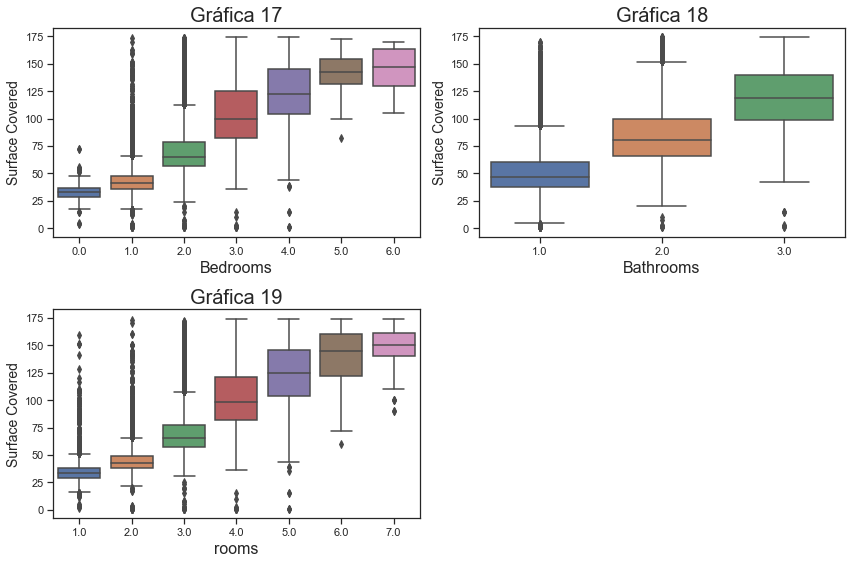

In [490]:
#Analizamos por tipo de espacio o similitudes.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop1_c, x='bedrooms',y="surface_covered",ax=ax1)
sns.boxplot(data = df_prop1_c, x='bathrooms',y="surface_covered",ax=ax2)
sns.boxplot(data = df_prop1_c, x='rooms',y="surface_covered",ax=ax3)

ax1.set_title('Gráfica 17', fontsize=20)
ax2.set_title('Gráfica 18',fontsize=20)
ax3.set_title('Gráfica 19',fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Surface Covered',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Surface Covered',fontsize=14)
ax3.set_xlabel('rooms',fontsize=16)
ax3.set_ylabel('Surface Covered',fontsize=14)

fig.tight_layout()
plt.show()



Se ve claro una relación entre las superficies construidas y la distribución de rooms, bedrooms y bathrooms

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 20. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y price para los Departamento.
    
<font color='black' face='arial' size=4>Gráfica 21.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y price para los Departamento. 

<font color='black' face='arial' size=4>Gráfica 22.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y price para los Departamento. 

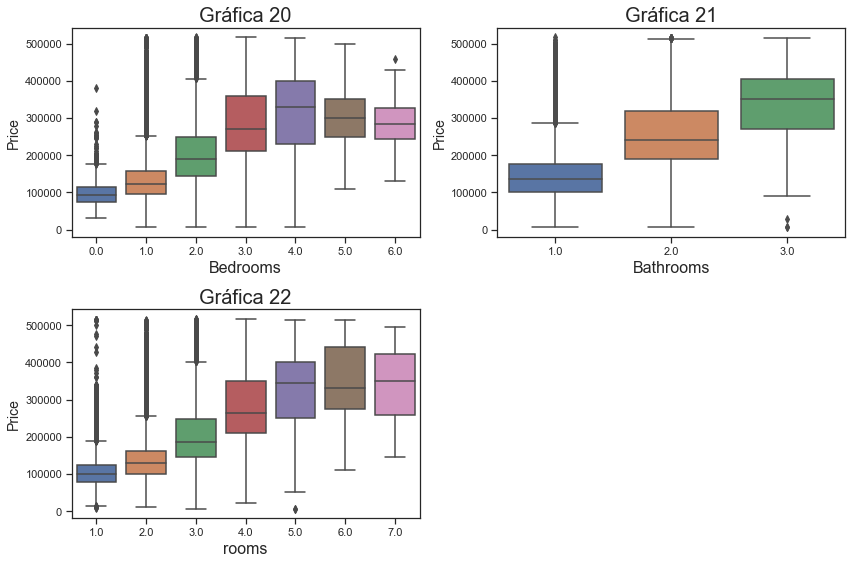

In [491]:
#Ahora comparamos con otra variable
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop1_c, x='bedrooms',y="price",ax=ax1)
sns.boxplot(data = df_prop1_c, x='bathrooms',y="price",ax=ax2)
sns.boxplot(data = df_prop1_c, x='rooms',y="price",ax=ax3)

ax1.set_title('Gráfica 20', fontsize=20)
ax2.set_title('Gráfica 21', fontsize=20)
ax3.set_title('Gráfica 22', fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)
ax3.set_xlabel('rooms',fontsize=16)
ax3.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()
#En la gráfica 1 se visualiza la relación entre bedrooms y price para los Departamento.
#En la gráfica 2 se visualiza la relación entre bathrooms y price para los Departamento.
#En la gráfica 3 se visualiza la relación entre rooms y price para los Departamento.

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 22. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se muestra como se comportan ambas variables en cuanto a su distribución.
    
<font color='black' face='arial' size=4>Gráfica 23.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se muestra la relación que tienen ambas variables, surface covered y surface total. 


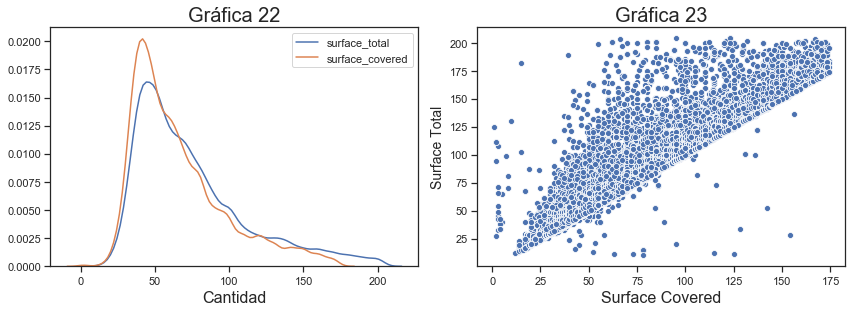

In [492]:
#Analizamos la relación de esta variable con dos gráficos distintos.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.kdeplot(df_prop1_c['surface_total'],ax=ax1)
sns.kdeplot(df_prop1_c['surface_covered'],ax=ax1)
sns.scatterplot(x="surface_covered", y="surface_total", data=df_prop1_c,ax=ax2)

ax1.set_title('Gráfica 22', fontsize=20)
ax1.set_xlabel('Cantidad', fontsize=16)
ax2.set_title('Gráfica 23',fontsize=20)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Surface Total',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre surface_covered y surface_total de los departamentos.
#En la gráfica 2 se utiliza un grafico de dispersión para ver una mejor relación entre las dos variables de los departamentos.


En las siguientes últimas dos gráficas se resumen las anteriores, tomando en cuenta las 2 
variables que tienen una mejor relación hacia el precio para los departamentos.

<font color='black' face='arial' size=4>Gráfica 24. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación entre los cuartos y el precio para las propiedades Departamento.
    
<font color='black' face='arial' size=4>Gráfica 25.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación entre la surface covered y el precio para los Departamento. 


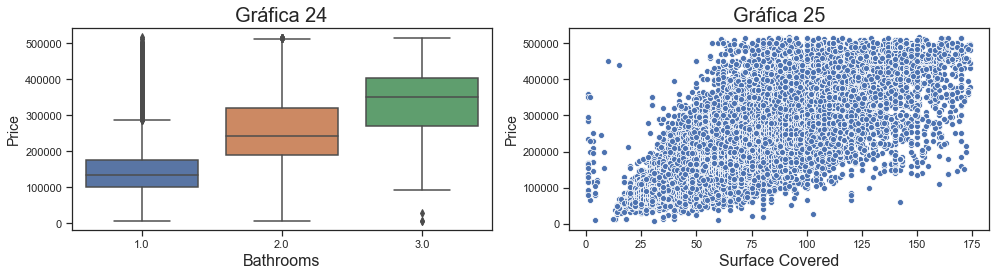

In [493]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data=df_prop1_c, x='bathrooms',y="price",ax=ax1)
sns.scatterplot(x="surface_covered", y="price", data=df_prop1_c,ax=ax2)

ax1.set_title('Gráfica 24', fontsize=20)
ax2.set_title('Gráfica 25',fontsize=20)
ax1.set_xlabel('Bathrooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre los cuartos y el precio para las propiedades Departamento.
#En la gráfica 2 se visualiza la relación entre la surface_covered y el precio para los Departamento.

In [494]:
#Ahora graficamos para otr tipo de propiedad.
prop_2_c ='PH' 
df_prop2_c = propiedades_curado[ propiedades_curado["property_type"] ==  prop_2_c]
print("Tipo de propiedad:",prop_2_c)
df_prop2_c.describe()

Tipo de propiedad: PH


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,9310.000000,9529.000000,9567.000000,9630.000000,9409.000000,8437.000000,8780.000000,9529.000000
mean,-34.605211,-58.450444,3.530783,2.467913,1.481029,101.185848,85.387472,209030.554623
std,0.023808,0.037636,1.146798,1.070453,0.625328,42.908974,36.071855,94820.686479
min,-34.658084,-58.530392,1.000000,0.000000,1.000000,10.000000,1.000000,27000.000000
25%,-34.620594,-58.481364,3.000000,2.000000,1.000000,65.000000,55.000000,135000.000000
50%,-34.605707,-58.445630,3.000000,2.000000,1.000000,96.000000,79.000000,190000.000000
75%,-34.591178,-58.422440,4.000000,3.000000,2.000000,130.000000,110.000000,268000.000000
max,-34.539825,-58.353930,7.000000,6.000000,3.000000,204.000000,174.000000,515000.000000


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 26. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y surface_covered para los PH.
    
<font color='black' face='arial' size=4>Gráfica 27.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y surface_covered para los PH. 

<font color='black' face='arial' size=4>Gráfica 28.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y surface_covered para los PH. 

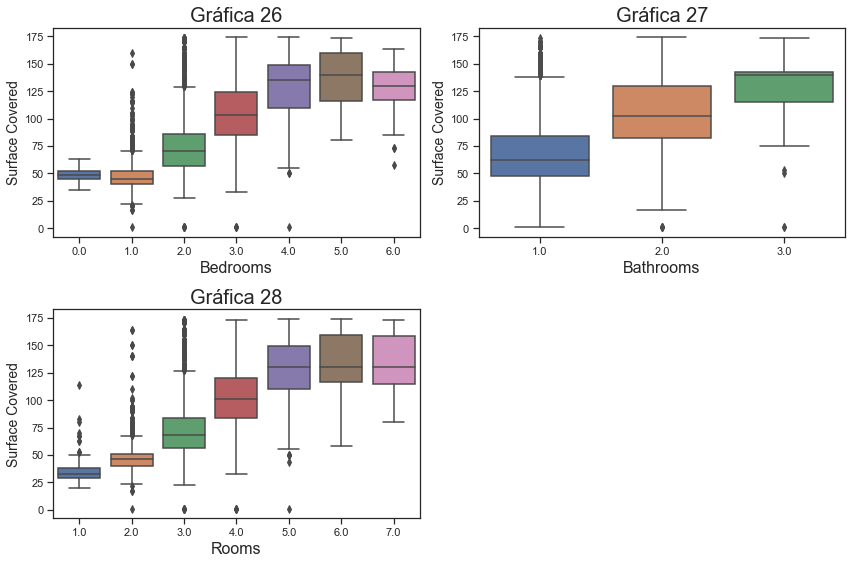

In [495]:
#Analizamos de igual forma como en el tipo de propiedad anterior
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop2_c, x='bedrooms',y="surface_covered",ax=ax1)
sns.boxplot(data = df_prop2_c, x='bathrooms',y="surface_covered",ax=ax2)
sns.boxplot(data = df_prop2_c, x='rooms',y="surface_covered",ax=ax3)

ax1.set_title('Gráfica 26', fontsize=20)
ax2.set_title('Gráfica 27', fontsize=20)
ax3.set_title('Gráfica 28', fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Surface Covered',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Surface Covered',fontsize=14)
ax3.set_xlabel('Rooms',fontsize=16)
ax3.set_ylabel('Surface Covered',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre bedrooms y surface_covered para los PH.
#En la gráfica 2 se visualiza la relación entre bathrooms y surface_covered para los PH.
#En la gráfica 3 se visualiza la relación entre rooms y surface_covered para los PH.

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 29. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y price para los PH.
    
<font color='black' face='arial' size=4>Gráfica 30.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y price para los PH. 

<font color='black' face='arial' size=4>Gráfica 31.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y price para los PH. 

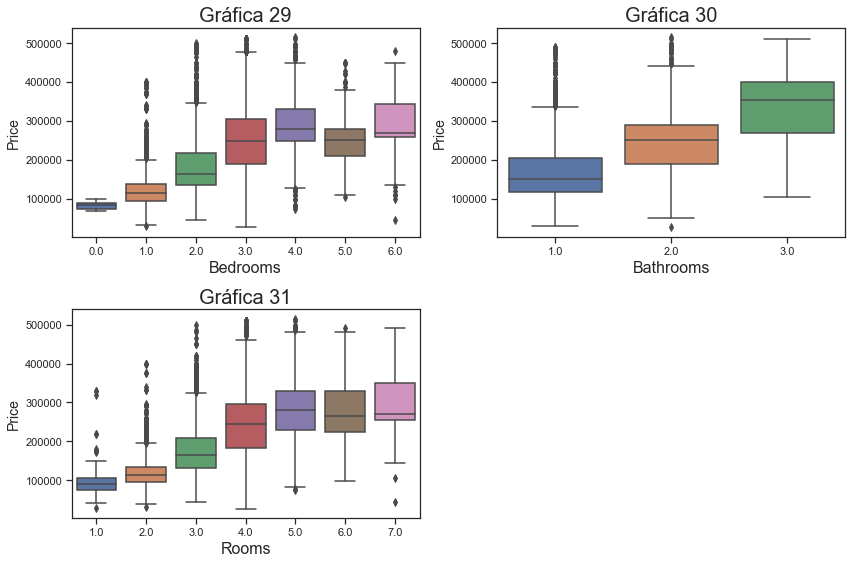

In [496]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop2_c, x='bedrooms',y="price",ax=ax1)
sns.boxplot(data = df_prop2_c, x='bathrooms',y="price",ax=ax2)
sns.boxplot(data = df_prop2_c, x='rooms',y="price",ax=ax3)

ax1.set_title('Gráfica 29', fontsize=20)
ax2.set_title('Gráfica 30', fontsize=20)
ax3.set_title('Gráfica 31', fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)
ax3.set_xlabel('Rooms',fontsize=16)
ax3.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre bedrooms y price para los PH.
#En la gráfica 2 se visualiza la relación entre bathrooms y price para los PH.
#En la gráfica 3 se visualiza la relación entre rooms y price para los PH.


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 32. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se muestra como se comportan ambas variables en cuanto a su distribución.
    
<font color='black' face='arial' size=4>Gráfica 33.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se muestra la relación que tienen ambas variables, surface covered y surface total. 


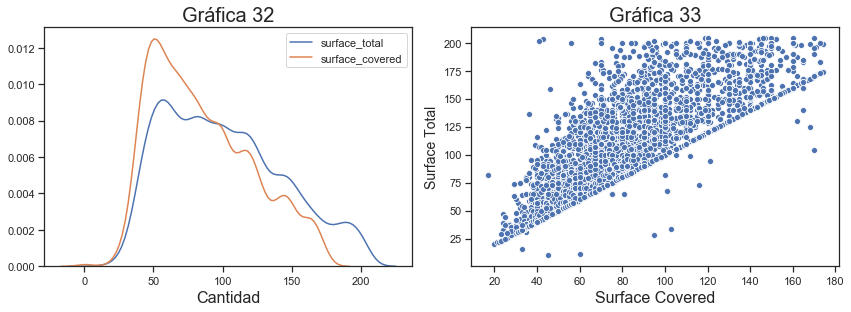

In [497]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.kdeplot(df_prop2_c['surface_total'],ax=ax1)
sns.kdeplot(df_prop2_c['surface_covered'],ax=ax1)
sns.scatterplot(x="surface_covered", y="surface_total", data=df_prop2_c,ax=ax2)

ax1.set_title('Gráfica 32', fontsize=20)
ax2.set_title('Gráfica 33', fontsize=20)
ax1.set_xlabel('Cantidad', fontsize=16)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Surface Total',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre surface_covered y surface_total de los PH.
#En la gráfica 2 se utiliza un grafico de dispersión para ver una mejor relación entre las dos variables de los PH.


<font color='black' face='arial' size=4>Gráfica 34. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación entre los cuartos y el precio para las propiedades PH.
    
<font color='black' face='arial' size=4>Gráfica 35.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación entre la surface covered y el precio para los PH. 

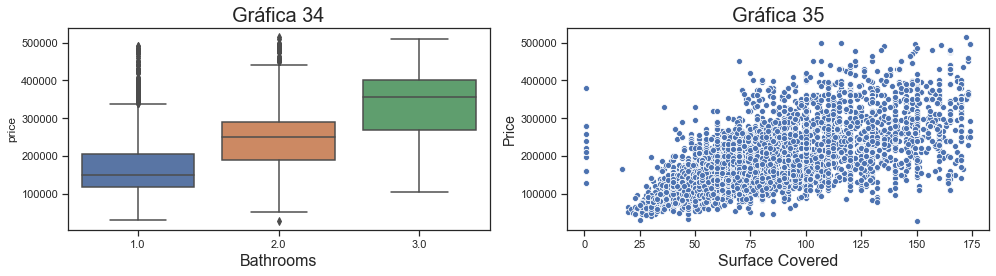

In [498]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data=df_prop2_c, x='bathrooms',y="price",ax=ax1)
sns.scatterplot(x="surface_covered", y="price", data=df_prop2_c,ax=ax2)

ax1.set_title('Gráfica 34', fontsize=20)
ax2.set_title('Gráfica 35', fontsize=20)
ax1.set_xlabel('Bathrooms', fontsize=16)
ax2.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()

#En estas dos últimas dos gráficas se resumen las anteriores, tomando en cuenta las 2 mejores variables que hay una mejor relación hacia el precio para los PH.
#En la gráfica 1 se visualiza la relación entre los cuartos y el precio para las propiedades PH.
#En la gráfica 2 se visualiza la relación entre la surface_covered y el precio para los PH.

In [499]:
#Analizamos la 3 y último tipo de propiedad de relevancia
prop_3_c ='Casa' 
df_prop3_c = propiedades_curado[ propiedades_curado["property_type"] ==  prop_3_c]
print("Tipo de propiedad:",prop_3_c)
df_prop3_c.describe()

Tipo de propiedad: Casa


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,2456.000000,2637.000000,2545.000000,2629.000000,2210.000000,943.000000,1066.000000,2144.000000
mean,-34.609871,-58.468669,4.625540,3.361354,2.031674,146.895016,121.757036,296751.762127
std,0.030017,0.037913,1.195862,1.067849,0.728947,40.471093,32.948759,105128.781341
min,-34.658170,-58.530468,1.000000,0.000000,1.000000,25.000000,25.000000,30000.000000
25%,-34.635662,-58.498602,4.000000,3.000000,1.250000,123.000000,99.000000,220000.000000
50%,-34.613960,-58.472529,5.000000,3.000000,2.000000,154.000000,125.000000,290000.000000
75%,-34.585978,-58.445357,5.000000,4.000000,3.000000,178.000000,150.000000,375000.000000
max,-34.540849,-58.359929,7.000000,6.000000,3.000000,204.000000,174.000000,515000.000000


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 36. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y surface_covered para las Casas.
    
<font color='black' face='arial' size=4>Gráfica 37.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y surface_covered para las Casas. 

<font color='black' face='arial' size=4>Gráfica 38.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y surface_covered para las Casas. 

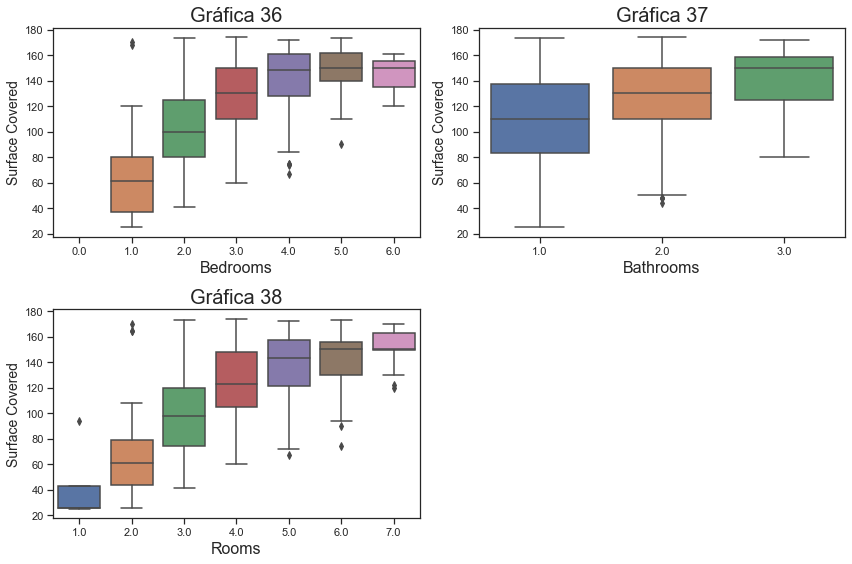

In [500]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop3_c, x='bedrooms',y="surface_covered",ax=ax1)
sns.boxplot(data = df_prop3_c, x='bathrooms',y="surface_covered",ax=ax2)
sns.boxplot(data = df_prop3_c, x='rooms',y="surface_covered",ax=ax3)

ax1.set_title('Gráfica 36', fontsize=20)
ax2.set_title('Gráfica 37',fontsize=20)
ax3.set_title('Gráfica 38',fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Surface Covered',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Surface Covered',fontsize=14)
ax3.set_xlabel('Rooms',fontsize=16)
ax3.set_ylabel('Surface Covered',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre bedrooms y surface_covered para los Casa.
#En la gráfica 2 se visualiza la relación entre bathrooms y surface_covered para los Casa.
#En la gráfica 3 se visualiza la relación entre rooms y surface_covered para los Casa.

<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 39. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación y proporción  entre bedrooms y surface_covered para las Casas.
    
<font color='black' face='arial' size=4>Gráfica 40.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación y proporción entre bathrooms y surface_covered para las Casas. 

<font color='black' face='arial' size=4>Gráfica 41.<font color='FIREBRICK' face='cambria' size=3> En la gráfica  se visualiza la relación y proporción entre rooms y surface_covered para las Casas. 

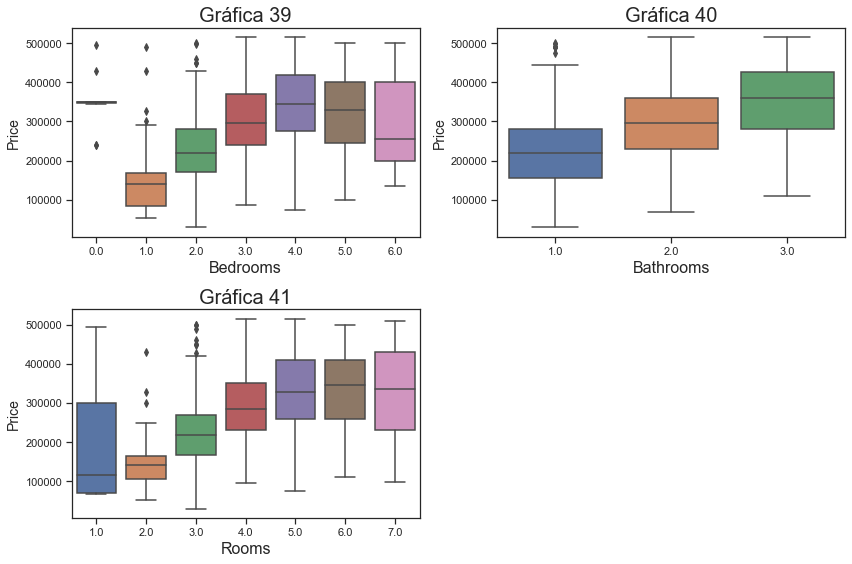

In [501]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

sns.boxplot(data = df_prop3_c, x='bedrooms',y="price",ax=ax1)
sns.boxplot(data = df_prop3_c, x='bathrooms',y="price",ax=ax2)
sns.boxplot(data = df_prop3_c, x='rooms',y="price",ax=ax3)

ax1.set_title('Gráfica 39', fontsize=20)
ax2.set_title('Gráfica 40',fontsize=20)
ax3.set_title('Gráfica 41',fontsize=20)
ax1.set_xlabel('Bedrooms', fontsize=16)
ax1.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Bathrooms',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)
ax3.set_xlabel('Rooms',fontsize=16)
ax3.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()
#En la gráfica 1 se visualiza la relación entre bedrooms y price para los Casa.
#En la gráfica 2 se visualiza la relación entre bathrooms y price para los Casa.
#En la gráfica 3 se visualiza la relación entre rooms y price para los Casa.


<font color='FIREBRICK' face='arial' size=4> En las siguientes gráficas:
 
<font color='black' face='arial' size=4>Gráfica 42. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se muestra como se comportan ambas variables en cuanto a su distribución.
    
<font color='black' face='arial' size=4>Gráfica 43.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se muestra la relación que tienen ambas variables, surface covered y surface total. 


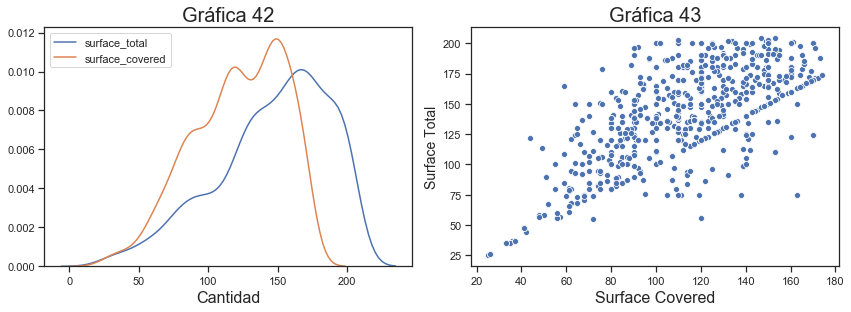

In [502]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.kdeplot(df_prop3_c['surface_total'],ax=ax1)
sns.kdeplot(df_prop3_c['surface_covered'],ax=ax1)
sns.scatterplot(x="surface_covered", y="surface_total", data=df_prop3_c,ax=ax2)

ax1.set_title('Gráfica 42', fontsize=20)
ax2.set_title('Gráfica 43', fontsize=20)
ax1.set_xlabel('Cantidad', fontsize=16)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Surface Total',fontsize=14)

fig.tight_layout()
plt.show()

#En la gráfica 1 se visualiza la relación entre surface_covered y surface_total de los Casa.
#En la gráfica 2 se utiliza un grafico de dispersión para ver una mejor relación entre las dos variables de los Casa.


<font color='black' face='arial' size=4>Gráfica 44. <font color='FIREBRICK' face='cambria' size=3>En la gráfica se visualiza la relación entre los cuartos y el precio para las propiedades Casas.
    
<font color='black' face='arial' size=4>Gráfica 45.<font color='FIREBRICK' face='cambria' size=3> En la gráfica se visualiza la relación entre la surface covered y el precio para las Casas. 

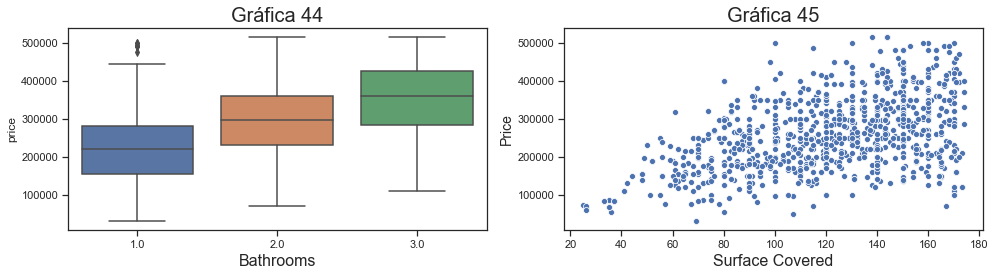

In [503]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data=df_prop3_c, x='bathrooms',y="price",ax=ax1)
sns.scatterplot(x="surface_covered", y="price", data=df_prop3_c,ax=ax2)

ax1.set_title('Gráfica 44', fontsize=20)
ax2.set_title('Gráfica 45', fontsize=20)
ax1.set_xlabel('Bathrooms', fontsize=16)
ax2.set_ylabel('Price',fontsize=14)
ax2.set_xlabel('Surface Covered',fontsize=16)
ax2.set_ylabel('Price',fontsize=14)

fig.tight_layout()
plt.show()
#En estas dos últimas dos gráficas se resumen las anteriores, tomando en cuenta las 2 mejores variables que hay una mejor relación hacia el precio para los Casa.
#En la gráfica 1 se visualiza la relación entre los cuartos y el precio para las propiedades Casa.
#En la gráfica 2 se visualiza la relación entre la surface_covered y el precio para los Casa.

***En conclusión. De primera instancia se logra ver una fuerte correlación entre la superficie construida, bathrooms y el precio, en cada tipo de propiedades***

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [504]:
#Filtramos los datos necesarios para realizar la tabla de correlación
fields=['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price','property_type']
propiedades3 = propiedades_curado[fields]

*Una vez filtrado por las variables requeridas, procedemos a separar por tipo de propiedad y estudiar individualmente las correlaciones.*

In [505]:
prop_1_c ='Departamento' 
df_prop1_c = propiedades3[ propiedades3["property_type"] ==  prop_1_c]
prop_2_c ='PH' 
df_prop2_c = propiedades3[ propiedades3["property_type"] ==  prop_2_c]
prop_3_c ='Casa' 
df_prop3_c = propiedades3[ propiedades3["property_type"] ==  prop_3_c]


Mapa de color para Departamento


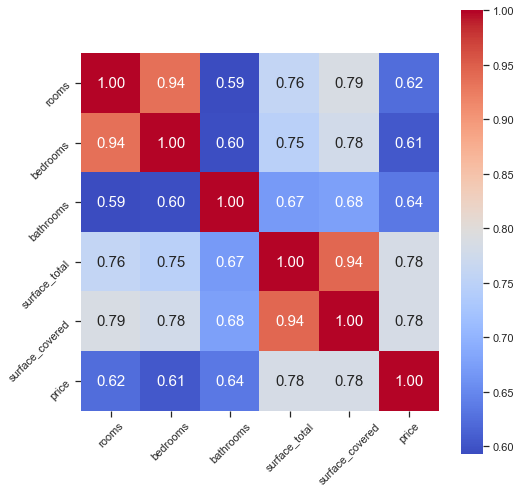

In [506]:
#Mapa de correlación para departamento
print('Mapa de color para Departamento')
corr = df_prop1_c.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_prop1_c.drop(columns = 'property_type').columns, 
           yticklabels= df_prop1_c.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()



Mapa de color para PH


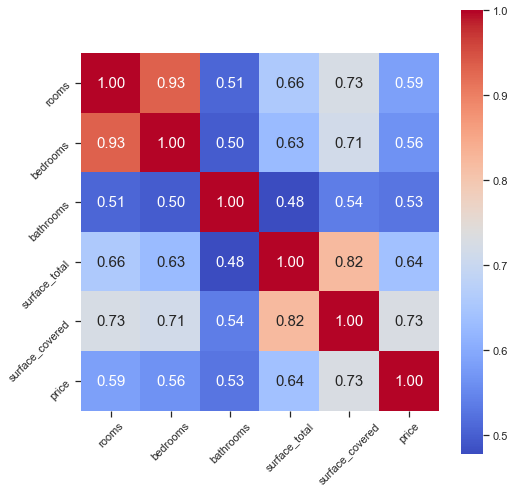

In [507]:
print('Mapa de color para PH')
corr = df_prop2_c.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_prop2_c.drop(columns = 'property_type').columns, 
           yticklabels= df_prop2_c.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Mapa de color para Casa


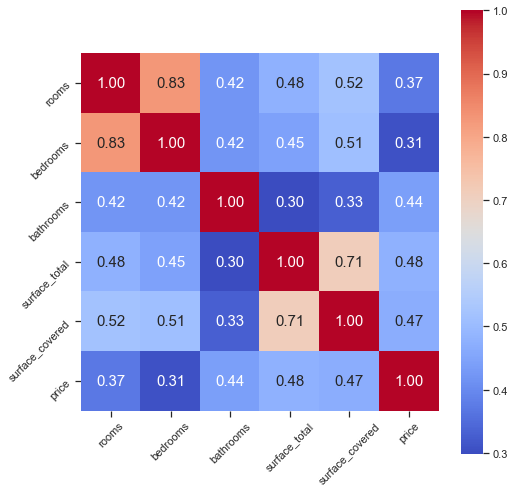

In [508]:
print('Mapa de color para Casa')
corr = df_prop3_c.drop(columns = 'property_type').corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_prop3_c.drop(columns = 'property_type').columns, 
           yticklabels= df_prop3_c.drop(columns = 'property_type').columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

***En conclusión, en los 3 tipos de propiedades las variables que guardan correlación con el precio son las mismas, no obstante no en todas guardan
la misma magnitud, es decir, en Departamentos y PH la relación con precio casi es el mismo valor, pero para las Casas el valor desciende
esto puede deberse a la cantidad de propiedades disponibles para este último tipo de propiedad***

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. 
Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.
¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)
¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? 
Probablemente puedas responder esta pregunta con este dataset.
Pero podria ocurrir que la respuesta esté sesgada. 
¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**Desafio**

**¿Que tipo de pregunta formulariamos a partir del dataset y que pueda ser respondido con el mismo?**

**La pregunta sería:**

**¿Que tipo de propiedad se relaciona o esta fuerte correlacionada con el precio y su ubicación?**

**Uno de los sesgos más importantes del dataset es realmente saber si no hay datos de relevancia omitidos ya se por el medio de venta o captura de los datos y otro es saber si el precio publicado fue el precio en el que finalizó la compra**

**A cuan generalizable es la respuesta obtenida . Con el dataset proporcionado, es ver las relaciones que tienen las variables hacia el precio y se ve que existen una gran cantidad de datos outliers y no es tan fácil generalizar.**

**Considero que la información que podría faltar es saber el costo final vendido para ver si hay una relación directa con el precio publicado o en su defecto si hay un tope de descuento.**

**Obtener esa información sería solo si la empresa tiene datos finales de venta.**

**El barrio más caro de buenos aires es palermo.**

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [509]:
#Procedemos a tomar el dataset inicial para el filtrado de las instancias necesarias
FiltroRegion=propiedades["l2"]=="Capital Federal"
FiltroPropiedad=(propiedades["property_type"]=="Departamento") | (propiedades["property_type"]=="Casa") | (propiedades["property_type"]=="PH")
FiltroPrecio=(propiedades['price']<=4000000)
FiltroComparativa=(propiedades['surface_covered']<=propiedades['surface_total'])
FiltroTamaño=((propiedades['surface_total']>=15)&(propiedades['surface_total']<=1000))
FiltroScovered=(propiedades['surface_covered']>=15)
field=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'] 
propiedades_maching_learning=propiedades[field][FiltroRegion & FiltroPropiedad & FiltroPrecio&FiltroComparativa&FiltroTamaño&FiltroScovered]
propiedades_maching_learning.shape
propiedades_maching_learning.isnull().sum()
propiedades_ml_2 = propiedades_maching_learning.fillna(propiedades_maching_learning.mean())
propiedades_ml_2.shape
#Se tomó la decisión de no eliminar las instancias completamente ya que tenian valores de importancia, es por ello que se 
#decidio rellenar los Nan con la media de los valores, con la intención de aprovechar los datos que ya se tenian en ese dataset
#Se busco de diversas formas, nunca nos acercamos tanto al dataset solicitado, sin embargo considerando el minímo desface proseguimos
#al entrenamiento del modelo

(81068, 6)

In [510]:
propiedades_ml_2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81068.000000,81068.000000,81068.000000,81068.000000,81068.000000,8.106800e+04
mean,3.004453,1.998409,1.553771,95.308025,82.026447,2.635564e+05
std,1.297303,1.044821,0.846210,77.159182,61.480512,2.986875e+05
min,1.000000,0.000000,1.000000,15.000000,15.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,891.000000,4.000000e+06


In [511]:
propiedades_ml_2.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925460,0.596986,0.726667,0.761401,0.480986
bedrooms,0.925460,1.000000,0.599124,0.695284,0.726783,0.442482
bathrooms,0.596986,0.599124,1.000000,0.646459,0.691542,0.636851
surface_total,0.726667,0.695284,0.646459,1.000000,0.931712,0.685736
surface_covered,0.761401,0.726783,0.691542,0.931712,1.000000,0.749072
price,0.480986,0.442482,0.636851,0.685736,0.749072,1.000000


*Se procede a escoger las variables que utilizaremos para entrenar nuestros modelos.*

In [512]:
x1=propiedades_ml_2['surface_covered'].values
x2=propiedades_ml_2['surface_total'].values
x3=propiedades_ml_2['bathrooms'].values
x4=propiedades_ml_2['rooms'].values
#x5=p8['bedrooms'].values
y=propiedades_ml_2['price'].values
#Se escribieron todas las variables posibles, pero se decidió trabajar con 4 variables que son las más fuertemente correlacionadas.

*Dividimos nuestro entrenamiento  y testeo*

In [513]:
X = np.vstack((x1,x2,x3,x4)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#Se decidio tomar la mayor cantidad de datos para el entrenamiento determinando dejar el 25% para el testeo

(60801, 4) (60801,) (20267, 4) (20267,)


<font color='black' face='arial' size=4>Modelo Benchmark a elegir. 
    
<font color='FIREBRICK' face='cambria' size=3> Se eligio el modelo de regresión lineal como nuestro modelo de referencia y comparativo, ya que aunque se pueden seguir parametros de benchmark más simple como el valor medio  del precio, se decidio utilizar un modelo como el regresión lineal debido a que es sencillo e interpretable ideal para marcar la pauta de como se comportan los dos modelos a entrenar, en este caso el modelo arboles de decisión y el de vecinos más cercanos.
    
<font color='FIREBRICK' face='cambria' size=3> Como ultima referencia se muestra un mapa que determina el nivel de interpretabilidad y su relación con accuracy, tomando como benchmark, el modelo más sencillo de todos ellos para poder comparar, este mapa no incluye knn pero es ilustrativo la relación de varios modelos utilizados para analisis de datos.
    

<img src="https://blog.fastforwardlabs.com/images/2017/08/2_16-1504056142850.png" width="400" />
    
<font color='FIREBRICK' face='cambria' size=3> A su vez, se detalla a mayor profunidad, el impacto y el uso de la regresión lineal en el mundo ecónomico y de otros fenomenos humanos, para ello y extensamente explicamos citamos el siguiente articulo.
<font color='FIREBRICK' face='cambria' size=3> http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/GuiaSPSS/18reglin.pdf


In [514]:
#Modelo Benchmark
linear_model = LinearRegression()
#Modelos a entrenar
tree_regressor = DecisionTreeRegressor(max_depth=13, random_state=100)
knn_regressor = KNeighborsRegressor(n_neighbors=3)


In [515]:
#Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

*Se hace una evaluación del modelo de regresion lineal con el valor r*

In [516]:
r2=linear_model.score(X,y)
r2

0.6156200273098392

In [517]:
print(linear_model.coef_, linear_model.intercept_)

[  4084.28362903   -262.2745022   91866.32234851 -60103.26600324] -7909.789986751915


<font color='black' face='arial' size=4>Métrica elegida. 
    
<font color='FIREBRICK' face='cambria' size=3> *Se seleccionó evaluar los modelos con RMSE ya que consideró que es la metrica que más se ajusta al tipo de problema a evaluar, ya que se utiliza con frecuencia en problemas de pronosticos de demanda y pronosticos de precios, haciendo que la diferencia del fallo del modelo no sea tan castigado., no obstante siempre termina no siendo perfecto el análisis*.
    




Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 186490.92215805393
Raíz del error cuadrático medio en Test: 181191.49835936844


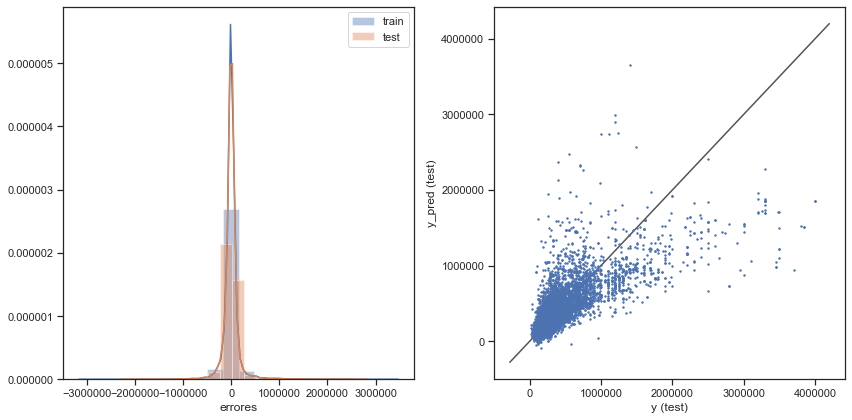

In [518]:
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (12,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

*Se procedera a comparar gráficamente los dos modelos evaluados con el de benchmark*

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 92109.63353797153
Raíz del error cuadrático medio en Test: 140059.7889875256


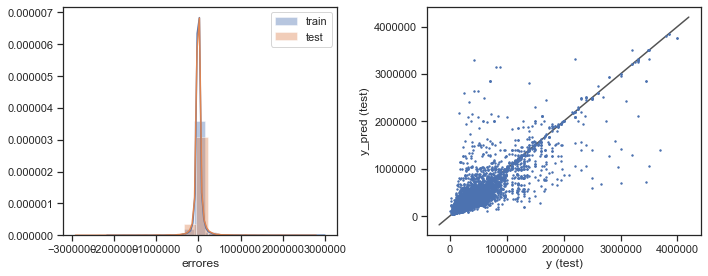

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 104652.81469288921
Raíz del error cuadrático medio en Test: 144703.6638502257


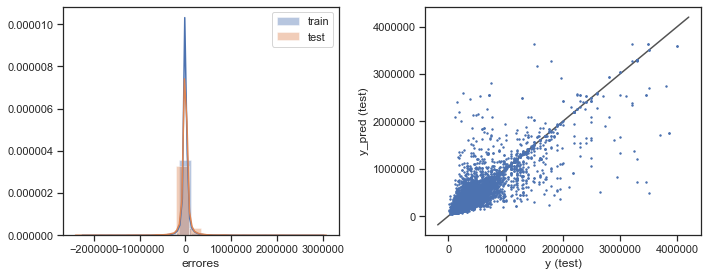

In [519]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Se procede a mejorar el desempeño de los hiper-parámetros, para ello se hace un for para evaluar con ciertos valores, que modelo se desempeña mejor**

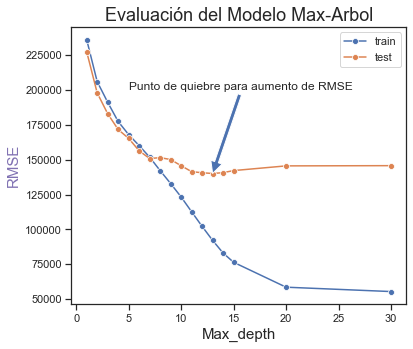

,profundidad,rmse_tree_train,rmse_tree_test,rmse_diff
0,1,236120.977481,227441.317356,-8679.660125
1,2,205997.569336,197917.540301,-8080.029036
2,3,191175.928007,182969.548508,-8206.379499
3,4,177355.779516,171630.021106,-5725.758410
4,5,167957.922154,165253.677363,-2704.244791
5,6,160067.825249,156350.255365,-3717.569884
6,7,151789.683351,150790.394513,-999.288839
7,8,142144.964342,151439.117298,9294.152956
8,9,132873.374736,150071.056197,17197.681461
9,10,123228.740081,145626.102377,22397.362296


In [520]:
#Optimizando modelo tree decision
size=[]
rmse_tree_test=[]
rmse_tree_train=[]
rmse_diff=[]
valores=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]

for n in valores :
    size.append(n)

    tree_regressor = DecisionTreeRegressor(max_depth=n, random_state=100)
    tree_regressor.fit(X_train, y_train)
    y_train_pred_tree =tree_regressor.predict(X_train)
    y_test_pred_tree = tree_regressor.predict(X_test)
    rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
    rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))   
   
    
    dif=rmse_test_tree-rmse_train_tree
    rmse_tree_test.append(rmse_test_tree)
    rmse_tree_train.append(rmse_train_tree)
    rmse_diff.append(dif)     
    
    
data_arbol=pd.DataFrame({'profundidad':size,'rmse_tree_train':rmse_tree_train, 'rmse_tree_test':rmse_tree_test,'rmse_diff':rmse_diff})

f, ax = plt.subplots(figsize=(6, 5))
ax=sns.lineplot(x = "profundidad", y = "rmse_tree_train", data = data_arbol,marker="o")
ax=sns.lineplot(x = "profundidad", y = "rmse_tree_test", data = data_arbol,marker="o")
#ax=sns.lineplot(x = "profundidad", y = "rmse_tree_train", data = data_arbol,marker="o", ax=ax)
#ax=sns.lineplot(x = "profundidad", y = "rmse_tree_test", data = data_arbol,marker="o",ax=ax)
ax.legend(["train","test"])
 
plt.title("Evaluación del Modelo Max-Arbol",fontsize = 18)
#ax.plot(y)
#ax1.annotate('maximo',(5,5),(3,1),arrowprops=dict())
ax.annotate("Punto de quiebre para aumento de RMSE",
             xy=(13,140059), xycoords='data',
             xytext=(5,200000), textcoords='data',
             arrowprops=dict())
plt.xlabel("Max_depth", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15, color='m')
plt.show()

data_arbol.head(20)

<font color='black' face='arial' size=4>Mejor hiperparametro en arbol de decisión. 
    
<font color='FIREBRICK' face='cambria' size=3>El mejor hiperparametro haciendo las pruebas con diferentes profundidades, es con profundidad de 13 hojas, ya que es en esa cantidad de profunidad que se obtiene el error más bajo en test y de alli empieza a aumentar de nueva cuenta, obtienendo un error aproximado de 140059.
    


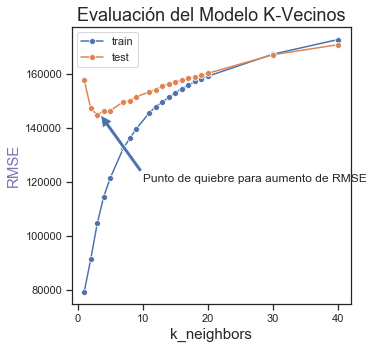

,profundidad,rmse_knn_train,rmse_knn_test,rmse_diff
0,1,79383.358039,157549.690540,78166.332500
1,2,91362.825424,147125.435948,55762.610524
2,3,104652.814693,144703.663850,40050.849157
3,4,114538.694996,146259.045232,31720.350237
4,5,121436.644186,146333.066308,24896.422123
5,7,132350.954607,149544.020092,17193.065485
6,8,136094.140763,150036.893885,13942.753123
7,9,139589.726329,151453.982976,11864.256647
8,11,145491.988492,153231.672648,7739.684156
9,12,147837.550731,154119.797663,6282.246931


In [521]:
#Optimizando modelo Knn
size=[]
rmse_knn_test=[]
rmse_knn_train=[]
rmse_diff=[]
valores=[1,2,3,4,5,7,8,9,11,12,13,14,15,16,17,18,19,20,30,40]
 
for n in valores :
    size.append(n)

    knn_regressor = KNeighborsRegressor(n_neighbors=n,algorithm='auto')
    knn_regressor.fit(X_train, y_train)
    y_train_pred_knn = knn_regressor.predict(X_train)
    y_test_pred_knn =  knn_regressor.predict(X_test)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))   
    
    dif=rmse_test_knn-rmse_train_knn
    rmse_knn_test.append(rmse_test_knn)
    rmse_knn_train.append(rmse_train_knn)
    rmse_diff.append(dif) 
    
data=pd.DataFrame({'profundidad':size,'rmse_knn_train':rmse_knn_train, 'rmse_knn_test':rmse_knn_test,'rmse_diff':rmse_diff})

f, ax = plt.subplots(figsize=(5, 5))
ax1=sns.lineplot(x = "profundidad", y = "rmse_knn_train", data = data,marker="o")
ax1=sns.lineplot(x = "profundidad", y = "rmse_knn_test", data = data,marker="o")

ax1.legend(["train","test"])
 

plt.title("Evaluación del Modelo K-Vecinos",fontsize = 18)

ax1.annotate("Punto de quiebre para aumento de RMSE",
             xy=(3.5,144700), xycoords='data',
             xytext=(10,120000), textcoords='data',
             arrowprops=dict())

plt.xlabel("k_neighbors", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15, color='m')
plt.show()

data.head(20)

<font color='black' face='arial' size=4>Mejor hiperparametro en vecinos mas cercanos. 
    
<font color='FIREBRICK' face='cambria' size=3>El mejor hiperparametro haciendo las pruebas con diferentes cantidad de vecinos, es con 3 vecinos, ya que es en esa cantidad de vecinos que se obtiene el error más bajo en test y de alli empieza a aumentar de nueva cuenta, el error más bajo obtenido en este modelo es de 144703 aproximadamente .
    
    
    

In [522]:
#Modelo Benchmark
linear_model = LinearRegression()
#Modelos a entrenar
tree_regressor = DecisionTreeRegressor(max_depth=13, random_state=100)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
#Entrenamos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

<font color='blue' face='arial' size=4> En la siguiente gráfica:
 
<font color='black' face='arial' size=4>Modelo Comparativo. 
    
 <font color='FIREBRICK' face='cambria' size=3>En la última gráfica se analiza en conjunto los 3 modelos y asi visualizar que modelo performa de mejor manera.

<Figure size 864x576 with 0 Axes>

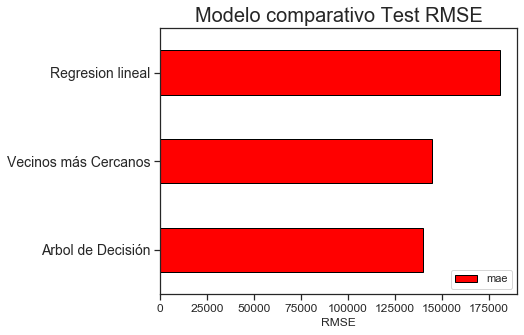

In [523]:
#plt.style.use('fivethirtyeight')
y_test_pred = linear_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
y_test_pred2 = tree_regressor.predict(X_test)
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
y_test_pred3 = knn_regressor.predict(X_test)
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))

fig=plt.figure(figsize=(12,8))



model_comparison = pd.DataFrame({'model': ['Regresion lineal', 'Arbol de Decisión',
                                           'Vecinos más Cercanos',
                                            ],
                                 'mae': [rmse_test, rmse_test2, rmse_test3, 
                                         ]})


model_comparison.sort_values('mae', ascending = True).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')


plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 12)
plt.title('Modelo comparativo Test RMSE', size = 20);

fig.autofmt_xdate()
fig.autofmt_xdate()
fig.tight_layout()


<font style='text-align:justify;' color='black' face='arial' size=4.5> El modelo que elegiría sería el de arboles de decisiones.
    
 

<font style="text_align:justify" color='black' face='cambria' size=3>Mi elección se debe que aún cuando se modificaron y se probaron con diferentes hiperparámetros, siempre el error fue menor en este modelo que en el de vecinos más cercanos y por ende comparado con el modelo base tambien tuvo mejor performance,a su vez el menor error con menor overfiting y underfiting se logro con este modelo.

<font style='text-align:justify;' color='black' face='cambria' size=3>Considero que la información que no se esta utilizando y podría apoyar es entrenar el modelo con las 3 principales zonas de buenos aires, ya que en este entrenamiento solo se utilizó Capital Federal, talvez la información que podria estar demás son la descripición de la vivienda y podría decirse que la superficie total y construida juegan un papel muy simetrico y similar en correlación con el precio.

<font style='text-align:justify;' color='black' face='cambria' size=3>Las variables que más determinaron en la predicción del precio, fue la superficie construida así como tambien elementos inesperados como los sanitarios, ya que tuvieron una fuerte correlación en cada tipo de propiedades.


<font color='black' face='cambria' size=4>CONCLUSIONES FINALES:

<font style='text-align:justify;' color='black' face='cambria' size=3>Nunca sabremos ni la veracidad ni  si es completa de los datos recavados, no obstante siempre tendremos la misión de interpretar lo mejor posible la información recibida, es por ello que el modelo estudiado nos marca la fuerte relación que hay entre el espacio construido y total y el precio, siempre nos faltara saber algún dato, pero siempre podremos contar nuestra historia con los datos recibidos.




    